# Tests on .idf file manipulations

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from eppy.modeleditor import IDF
import seaborn as sns

## How use eppy to run EnergyPlus

The use of the `eppy` library to run an `EnergyPlus` simulation requires the same input as a conventionnal simulation:
- an `.idf` file containing the description of the building, site, schedules, HVAC, etc ...
- an `.idd` file containing the dictionary that the simulator is going to use to decode the `.idf` file. *This file is version dependent* and one should care to use the right `.idd` based on his `EnergyPlus` distribution.
- an `.epw` file, containing the weather data that will be used during the simulation. This file is mandatory to run the simulation but is optionnal if `eppy` is used to only edit `.idf` files.

In [2]:
## Define the paths to the various inputs
# Specify path to the IDF file

idf_file_path = r".\cedric\CELL.idf"

# Specify path to the IDD file
idd_file_path = r".\input_data\Energy+.idd" # Energy+ v9.4 IDD

# Specify path to the weather file
weather_file_path = r".\input_data\-_FRIBOURG_MN7.epw"

# Set the idd file
IDF.setiddname(idd_file_path)

# Create an IDF object and load the IDF file
idf = IDF(idf_file_path, weather_file_path)

Once the object is created as a python object, `eppy` provides a lot of method to programmatically access to information about the `.idf` file.

In [3]:
# Print and check the idf file is the correct one 
idf.printidf()


Version,
    9.4.0.002;                !- Version Identifier

SimulationControl,
    Yes,                      !- Do Zone Sizing Calculation
    Yes,                      !- Do System Sizing Calculation
    Yes,                      !- Do Plant Sizing Calculation
    No,                       !- Run Simulation for Sizing Periods
    Yes;                      !- Run Simulation for Weather File Run Periods

Building,
    Building,                 !- Name
    0,                        !- North Axis
    Suburbs,                  !- Terrain
    0.04,                     !- Loads Convergence Tolerance Value
    0.4,                      !- Temperature Convergence Tolerance Value
    FullExterior,             !- Solar Distribution
    25,                       !- Maximum Number of Warmup Days
    6;                        !- Minimum Number of Warmup Days

ShadowCalculation,
    PolygonClipping,          !- Shading Calculation Method
    Periodic,                 !- Shading Calculation Update

Now that our `.idf` file is loaded as an object, `eppy` provides a compact and handy way to run a simulation with `EnergyPlus`

In [4]:
## Run base simulation
# readvars = True creates a .cvs of the results
# annual = True forces the simulation to run on an annual basis

idf.run(readvars=True,output_directory=r'.\output_data', annual=True, verbose='q', output_prefix='idf1_')

## Retrieve results and visualize them

The easy way to retrieve data is to use the power of Python libraries to manipulate large datasets. `Pandas` is probably the most complete and easy way to handle datasets in this range of size. The direct way is to make sure the results were generated as a `.csv` and simply load it as a `DataFrame` object. Then get back to your good old pandas habits!

**Note:** The timestamps of the `.csv` are not easily read and interpreted as timeseries by `Pandas`. Parsing them _à priori_ helps to correctly read the file. An adapted date parsing function resolves that, as the one proposed by [Steven Firth](https://www.stevenfirth.com/energyplus-simulation-and-analysis-using-python/) on his website. All credits to him.

In [5]:
# Steven Firth datetime parser
def parse_energyplus_datetime_string(st, year=2021):
    st=st.strip()
    month=int(st[0:2])
    day=int(st[3:5])
    hour=int(st[7:9])
    minute=int(st[10:12])
    second=(st[13:15])
    if not hour==24:
        dt=pd.Timestamp(year,month,day,hour,minute)
    else:
        hour=0
        dt=pd.Timestamp(year,month,day,hour,minute)
        dt+=pd.Timedelta('1 day')
    return dt

In [6]:
df=pd.read_csv(r".\output_data\idf1_out.csv", 
               parse_dates=[0],
               index_col=[0],
               date_parser=parse_energyplus_datetime_string 
              )
df.head()

,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),Environment:Site Outdoor Air Dewpoint Temperature [C](Hourly),Environment:Site Outdoor Air Barometric Pressure [Pa](Hourly),Environment:Site Wind Speed [m/s](Hourly),Environment:Site Wind Direction [deg](Hourly),Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](Hourly),Environment:Site Direct Solar Radiation Rate per Area [W/m2](Hourly),Environment:Site Solar Azimuth Angle [deg](Hourly),Environment:Site Solar Altitude Angle [deg](Hourly),CELLS:ROOMX1:Zone Total Internal Latent Gain Energy [J](Hourly),...,CELLS:ROOMX1:Zone Mechanical Ventilation Standard Density Volume Flow Rate [m3/s](Hourly),CELLS:ROOMX1:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),CELLS:ENTRANCE:Zone Mechanical Ventilation Standard Density Volume Flow Rate [m3/s](Hourly),CELLS:ENTRANCE:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),CELLS:ROOMX2:Zone Mechanical Ventilation Standard Density Volume Flow Rate [m3/s](Hourly),CELLS:ROOMX2:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),Electricity:Facility [J](Hourly),InteriorEquipment:Electricity [J](Hourly),InteriorLights:Electricity [J](Hourly),Carbon Equivalent:Facility [kg](Hourly)
Date/Time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,7.500,5.300,94390.0,0.650,183.75,0.0,0.0,8.485838,-66.010149,0.0,...,0.013549,0.827465,0.014966,1.160685,0.014261,0.827421,538798.420885,5812.315488,0.0,0.0
2021-01-01 02:00:00,7.875,4.400,94328.0,0.500,232.25,0.0,0.0,36.510800,-62.284889,0.0,...,0.013549,0.827749,0.014966,1.160887,0.014261,0.827709,538798.420885,5812.315488,0.0,0.0
2021-01-01 03:00:00,7.750,3.625,94328.0,0.250,249.75,0.0,0.0,58.861858,-54.694178,0.0,...,0.013549,0.827150,0.014966,1.159841,0.014261,0.827111,538798.420885,5812.315488,0.0,0.0
2021-01-01 04:00:00,7.625,3.350,94328.0,0.425,261.00,0.0,0.0,74.726170,-45.281853,0.0,...,0.013549,0.826560,0.014966,1.158873,0.014261,0.826520,538798.420885,5812.315488,0.0,0.0
2021-01-01 05:00:00,7.525,3.150,94328.0,0.500,263.50,0.0,0.0,87.107574,-35.171794,0.0,...,0.013549,0.826022,0.014966,1.158011,0.014261,0.825984,538798.420885,5812.315488,0.0,0.0


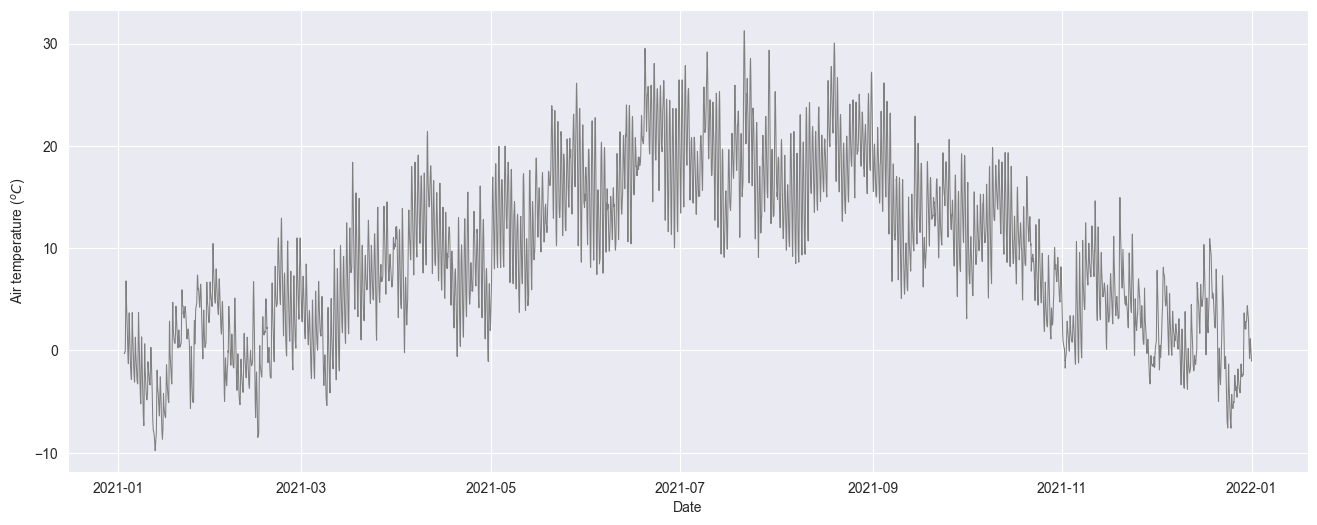

In [7]:
fig, ax = plt.subplots(figsize=(16, 6))
ax.plot(df['Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)'][48:],
        color='grey',
        linewidth=0.75
        )
ax.set_xlabel('Date')
ax.set_ylabel('Air temperature (${^o}C$)')
plt.show()

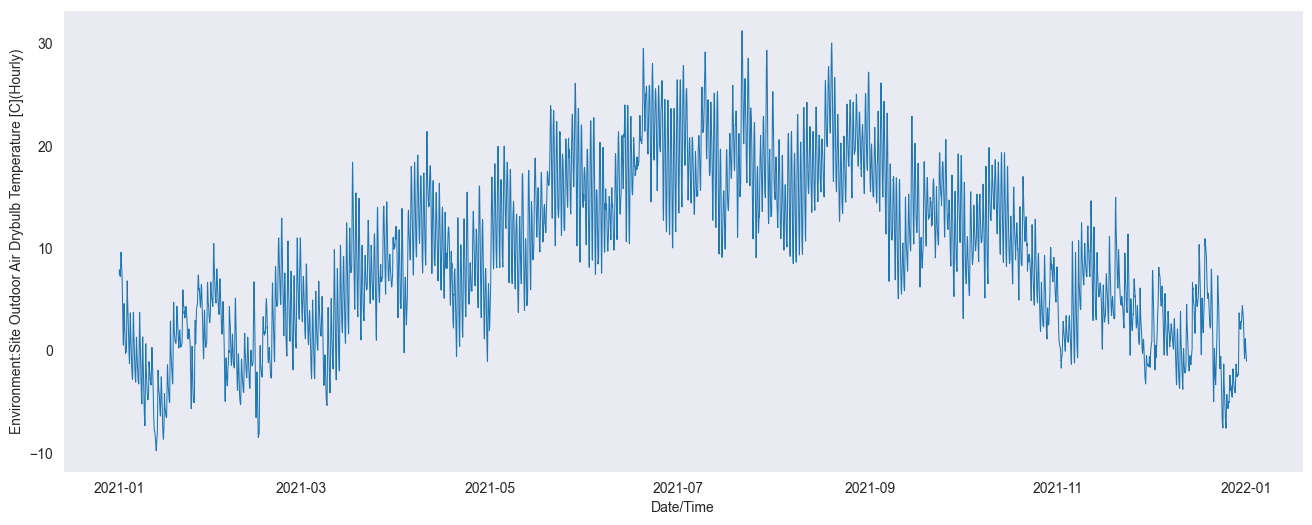

In [8]:
fig, ax = plt.subplots(figsize=(16, 6))
sns.lineplot(data=df, x='Date/Time', y='Environment:Site Outdoor Air Drybulb Temperature [C](Hourly)', linewidth=0.75)
plt.grid()

## Modify `.idf` files using `eppy`

The first goal of this library is to programmatically access the `.idf` files and modify their content using Python. Let's see how it can be easily done.

In [9]:
idf.printidf()


Version,
    9.4.0.002;                !- Version Identifier

SimulationControl,
    Yes,                      !- Do Zone Sizing Calculation
    Yes,                      !- Do System Sizing Calculation
    Yes,                      !- Do Plant Sizing Calculation
    No,                       !- Run Simulation for Sizing Periods
    Yes;                      !- Run Simulation for Weather File Run Periods

Building,
    Building,                 !- Name
    0,                        !- North Axis
    Suburbs,                  !- Terrain
    0.04,                     !- Loads Convergence Tolerance Value
    0.4,                      !- Temperature Convergence Tolerance Value
    FullExterior,             !- Solar Distribution
    25,                       !- Maximum Number of Warmup Days
    6;                        !- Minimum Number of Warmup Days

ShadowCalculation,
    PolygonClipping,          !- Shading Calculation Method
    Periodic,                 !- Shading Calculation Update

In the present case, what will be modified is the heating temperature setpoint. To do so, one must first understand how the `.idf` file works and how EnergyPlus manages them. The main structure EnergyPlus needs is a Schedule. A good ressource to understand this structure is [BigLadderSoftware](https://bigladdersoftware.com/epx/docs/9-0/input-output-reference/group-schedules.html). In a nutshell, the structure of the Schedules are divided in 3 subparts:
- Day Schedule (Schedule:Day:Hourly)
- Week Schedule (Schedule:Week:Daily)
- Year Schedule (Schedule:Year)

However, other fields are available to help interface external data with idf files. In this example, the SIA norms are used to define the temperature setpoints. From the `.idf` files, it can be seen that the `Schedule:Day:List` fields is used to define the SIA norms. The index [2] and [3] are respectively defining the heating and cooling setpoints hour by hour. Let's access it with `eppy`.

In [10]:
idf.idfobjects["Schedule:Day:List"][2]



Schedule:Day:List,
    10003_-50_12_21,          !- Name
    Any number,               !- Schedule Type Limits Name
    No,                       !- Interpolate to Timestep
    60,                       !- Minutes per Item
    -50,                      !- Value 1
    -50,                      !- Value 2
    -50,                      !- Value 3
    -50,                      !- Value 4
    -50,                      !- Value 5
    -50,                      !- Value 6
    -50,                      !- Value 7
    12,                       !- Value 8
    21,                       !- Value 9
    21,                       !- Value 10
    21,                       !- Value 11
    21,                       !- Value 12
    12,                       !- Value 13
    21,                       !- Value 14
    21,                       !- Value 15
    21,                       !- Value 16
    21,                       !- Value 17
    12,                       !- Value 18
    -50,                     

In [11]:
# Create a copy of the base idf to modify some values
idf2 = idf.copyidf()

# .copyidf() only copy the idf file part: it is necessary to reassign a weather file
idf2.epw = weather_file_path 

In [12]:
schedule_day_list = idf2.idfobjects["Schedule:Day:List"][2].obj

In [13]:
for i in range(13, 21):  # Assuming the values start from index 8 and end at index 23
    # Modify the temperature value to 0 degrees Celsius
    schedule_day_list[i] = 17

In [14]:
idf2.idfobjects["Schedule:Day:List"][2].obj

['Schedule:Day:List',
 '10003_-50_12_21',
 'Any number',
 'No',
 60,
 -50.0,
 -50.0,
 -50.0,
 -50.0,
 -50.0,
 -50.0,
 -50.0,
 12.0,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 17,
 21.0,
 12.0,
 -50.0,
 -50.0,
 -50.0,
 -50.0,
 -50.0,
 -50.0]

In [15]:
# Run a new simulation with the modified idf
idf2.run(readvars=True,output_directory=r'.\output_data', annual=True, verbose='q', output_prefix='idf2_')

In [16]:
# Load second DataFrame
df2=pd.read_csv(r".\output_data\idf2_out.csv", 
               parse_dates=[0],
               index_col=[0],
               date_parser=parse_energyplus_datetime_string 
              )
df2.head()

,Environment:Site Outdoor Air Drybulb Temperature [C](Hourly),Environment:Site Outdoor Air Dewpoint Temperature [C](Hourly),Environment:Site Outdoor Air Barometric Pressure [Pa](Hourly),Environment:Site Wind Speed [m/s](Hourly),Environment:Site Wind Direction [deg](Hourly),Environment:Site Diffuse Solar Radiation Rate per Area [W/m2](Hourly),Environment:Site Direct Solar Radiation Rate per Area [W/m2](Hourly),Environment:Site Solar Azimuth Angle [deg](Hourly),Environment:Site Solar Altitude Angle [deg](Hourly),CELLS:ROOMX1:Zone Total Internal Latent Gain Energy [J](Hourly),...,CELLS:ROOMX1:Zone Mechanical Ventilation Standard Density Volume Flow Rate [m3/s](Hourly),CELLS:ROOMX1:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),CELLS:ENTRANCE:Zone Mechanical Ventilation Standard Density Volume Flow Rate [m3/s](Hourly),CELLS:ENTRANCE:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),CELLS:ROOMX2:Zone Mechanical Ventilation Standard Density Volume Flow Rate [m3/s](Hourly),CELLS:ROOMX2:Zone Mechanical Ventilation Air Changes per Hour [ach](Hourly),Electricity:Facility [J](Hourly),InteriorEquipment:Electricity [J](Hourly),InteriorLights:Electricity [J](Hourly),Carbon Equivalent:Facility [kg](Hourly)
Date/Time,,,,,,,,,,,,,,,,,,,,,
2021-01-01 01:00:00,7.500,5.300,94390.0,0.650,183.75,0.0,0.0,8.485838,-66.010149,0.0,...,0.013549,0.823403,0.014966,1.158257,0.014261,0.823345,538798.420885,5812.315488,0.0,0.0
2021-01-01 02:00:00,7.875,4.400,94328.0,0.500,232.25,0.0,0.0,36.510800,-62.284889,0.0,...,0.013549,0.823760,0.014966,1.158410,0.014261,0.823706,538798.420885,5812.315488,0.0,0.0
2021-01-01 03:00:00,7.750,3.625,94328.0,0.250,249.75,0.0,0.0,58.861858,-54.694178,0.0,...,0.013549,0.823225,0.014966,1.157325,0.014261,0.823171,538798.420885,5812.315488,0.0,0.0
2021-01-01 04:00:00,7.625,3.350,94328.0,0.425,261.00,0.0,0.0,74.726170,-45.281853,0.0,...,0.013549,0.822692,0.014966,1.156324,0.014261,0.822638,538798.420885,5812.315488,0.0,0.0
2021-01-01 05:00:00,7.525,3.150,94328.0,0.500,263.50,0.0,0.0,87.107574,-35.171794,0.0,...,0.013549,0.822209,0.014966,1.155435,0.014261,0.822156,538798.420885,5812.315488,0.0,0.0


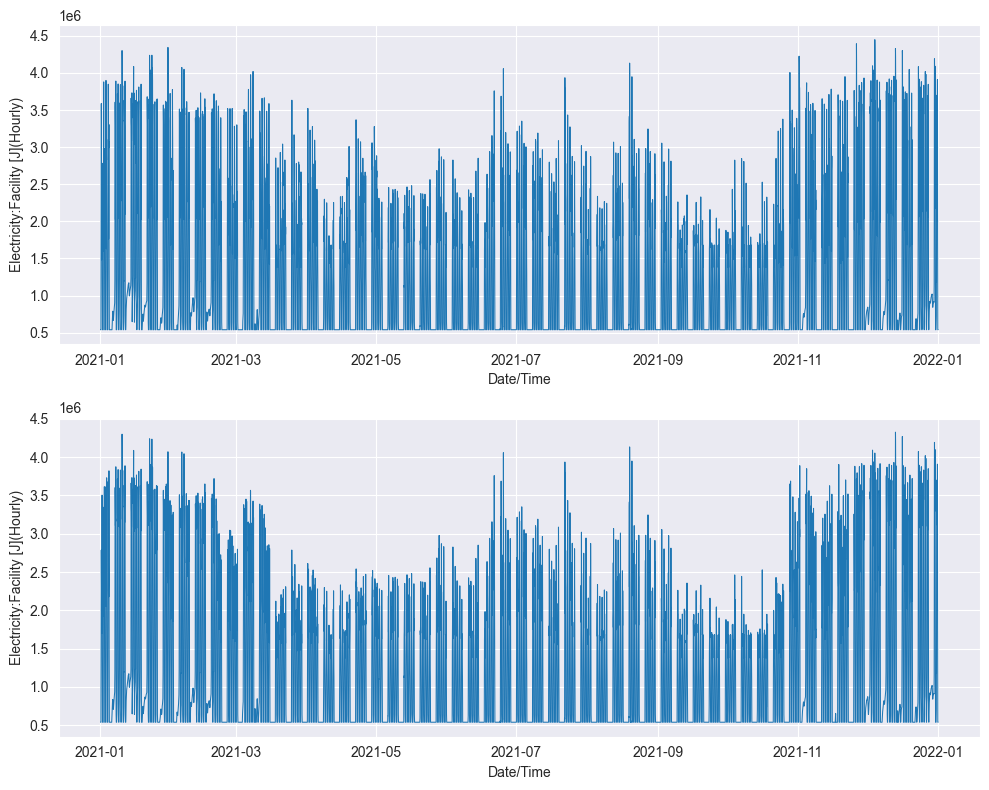

In [17]:
fig, axs = plt.subplots(2, 1, figsize=(10, 8))  # 2 rows, 1 column

sns.lineplot(data=df, x='Date/Time',y='Electricity:Facility [J](Hourly)', ax=axs[0], linewidth=0.75)
sns.lineplot(data=df2, x='Date/Time',y='Electricity:Facility [J](Hourly)', ax=axs[1],linewidth=0.75)

# Adjust layout
plt.tight_layout()

# Show the plots
plt.show()

In [18]:
# Create a copy of the base idf to modify some values
idf3 = idf.copyidf()

# .copyidf() only copy the idf file part: it is necessary to reassign a weather file
idf3.epw = weather_file_path 

In [26]:
idf3.printidf()


SimulationControl,
    Yes,                      !- Do Zone Sizing Calculation
    Yes,                      !- Do System Sizing Calculation
    Yes,                      !- Do Plant Sizing Calculation
    No,                       !- Run Simulation for Sizing Periods
    Yes;                      !- Run Simulation for Weather File Run Periods

Building,
    Building,                 !- Name
    0,                        !- North Axis
    Suburbs,                  !- Terrain
    0.04,                     !- Loads Convergence Tolerance Value
    0.4,                      !- Temperature Convergence Tolerance Value
    FullExterior,             !- Solar Distribution
    25,                       !- Maximum Number of Warmup Days
    6;                        !- Minimum Number of Warmup Days

ShadowCalculation,
    PolygonClipping,          !- Shading Calculation Method
    Periodic,                 !- Shading Calculation Update Frequency Method
    20,                       !- Shading Cal

In [46]:
for name in idf3.idfobjects:
    if ('HVAC' in name) and (len(idf3.idfobjects[name]) !=0):
        print(name)

ZONEHVAC:TERMINALUNIT:VARIABLEREFRIGERANTFLOW
ZONEHVAC:AIRDISTRIBUTIONUNIT
ZONEHVAC:EQUIPMENTLIST
ZONEHVAC:EQUIPMENTCONNECTIONS
AIRLOOPHVAC:CONTROLLERLIST
AIRLOOPHVAC
AIRLOOPHVAC:OUTDOORAIRSYSTEM:EQUIPMENTLIST
AIRLOOPHVAC:OUTDOORAIRSYSTEM
AIRLOOPHVAC:ZONESPLITTER
AIRLOOPHVAC:SUPPLYPATH
AIRLOOPHVAC:ZONEMIXER
AIRLOOPHVAC:RETURNPATH


In [47]:
idf3.idfobjects['ZONEHVAC:EQUIPMENTLIST']

[
ZoneHVAC:EquipmentList,
    CELLS:RoomX1 Equipment,    !- Name
    SequentialLoad,           !- Load Distribution Scheme
    ZoneHVAC:TerminalUnit:VariableRefrigerantFlow,    !- Zone Equipment 1 Object Type
    CELLS:RoomX1 VRF Indoor Unit,    !- Zone Equipment 1 Name
    2,                        !- Zone Equipment 1 Cooling Sequence
    2,                        !- Zone Equipment 1 Heating or NoLoad Sequence
    Cooling fraction schedule,    !- Zone Equipment 1 Sequential Cooling Fraction Schedule Name
    Heating fraction schedule,    !- Zone Equipment 1 Sequential Heating Fraction Schedule Name
    ZoneHVAC:AirDistributionUnit,    !- Zone Equipment 2 Object Type
    CELLS:RoomX1 Single Duct CAV No Reheat ADU,    !- Zone Equipment 2 Name
    1,                        !- Zone Equipment 2 Cooling Sequence
    1,                        !- Zone Equipment 2 Heating or NoLoad Sequence
    Cooling fraction schedule,    !- Zone Equipment 2 Sequential Cooling Fraction Schedule Name
    Heat